Portfolio Optimization using Scipy.Optimize library

In [2]:
#Import the libraries

import pandas as pd
import yfinance as yf
import numpy as np
import quantstats as qs
import datetime as datetime
import seaborn as sns
import pyfolio as pf
import scipy.optimize as sco
import scipy.stats as scs
from scipy.optimize import minimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import mpl, plt
plt.style.use('seaborn')
%matplotlib inline

c:\Python311\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(
C:\Users\aaron\AppData\Local\Temp\ipykernel_13760\1811735170.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
tickers= ['AAPL', 'ADBE', 'AMD', 'AMZN', 'GOOG', 'META', 'MSFT', 'NFLX', 'NVDA', 'TSLA']
n_assets= len(tickers)


In [4]:
start_date = "2019-06-15"
end_date = "2023-06-16"
df_prices = yf.download(tickers, start_date, end_date)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [5]:
df_prices.head().dropna()

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2019-06-17,47.029114,275.600006,29.200001,94.301498,54.625000,189.009995,127.689636,350.619995,36.060200,15.002000
2019-06-18,48.135162,276.779999,30.450001,95.068497,55.180000,188.470001,129.909866,357.119995,38.012016,14.982667
2019-06-19,47.994484,291.209991,30.500000,95.439499,55.116501,187.479996,130.419281,363.519989,38.071682,15.095333
2019-06-20,48.380142,302.109985,30.010000,95.909500,55.570999,189.529999,131.630341,365.209991,38.315353,14.641333
2019-06-21,48.215214,299.329987,29.100000,95.565002,56.094002,191.139999,131.649551,369.209991,37.733543,14.790667


In [7]:
df_prices.tail()

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2023-06-09,180.960007,454.000000,124.919998,123.430000,122.870003,264.950012,326.790009,420.019989,387.700012,244.399994
2023-06-12,183.789993,474.630005,129.190002,126.570000,124.349998,271.049988,331.850006,423.970001,394.820007,249.830002
2023-06-13,183.309998,478.989990,124.529999,126.660004,124.430000,271.320007,334.290009,435.730011,410.220001,258.709991
2023-06-14,183.949997,479.529999,127.330002,126.419998,124.379997,273.350006,337.339996,440.859985,429.970001,256.790009
2023-06-15,186.009995,490.910004,124.239998,127.110001,125.790001,281.829987,348.100006,445.269989,426.529999,255.899994


Text(0.5, 1.0, 'Adj Close')

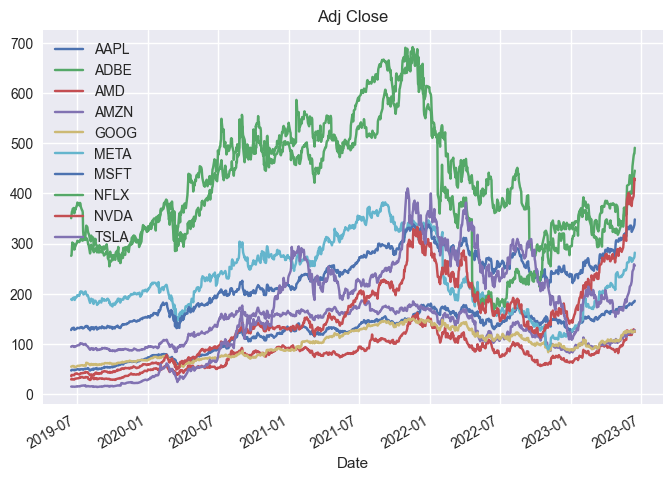

In [8]:
df_prices.plot()
plt.title('Adj Close')

Calculate the Log returns

In [9]:
log_returns= np.log(df_prices/df_prices.shift(1)).dropna()

In [10]:
log_returns

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2019-06-18,0.023246,0.004272,0.041917,0.008101,0.010109,-0.002861,0.017238,0.018369,0.052713,-0.001290
2019-06-19,-0.002927,0.050822,0.001641,0.003895,-0.001151,-0.005267,0.003914,0.017762,0.001568,0.007492
2019-06-20,0.008003,0.036747,-0.016196,0.004913,0.008212,0.010875,0.009243,0.004638,0.006380,-0.030537
2019-06-21,-0.003415,-0.009245,-0.030792,-0.003598,0.009367,0.008459,0.000146,0.010893,-0.015301,0.010148
2019-06-24,-0.001007,0.001802,0.005483,0.001359,-0.005685,0.007609,0.005896,0.004944,0.005913,0.007991
...,...,...,...,...,...,...,...,...,...,...
2023-06-09,0.002157,0.033529,0.031470,-0.006621,0.001629,0.001398,0.004693,0.025683,0.006729,0.039817
2023-06-12,0.015518,0.044438,0.033611,0.025121,0.011973,0.022762,0.015365,0.009360,0.018198,0.021974
2023-06-13,-0.002615,0.009144,-0.036738,0.000711,0.000643,0.000996,0.007326,0.027360,0.038264,0.034927


<Axes: xlabel='Date'>

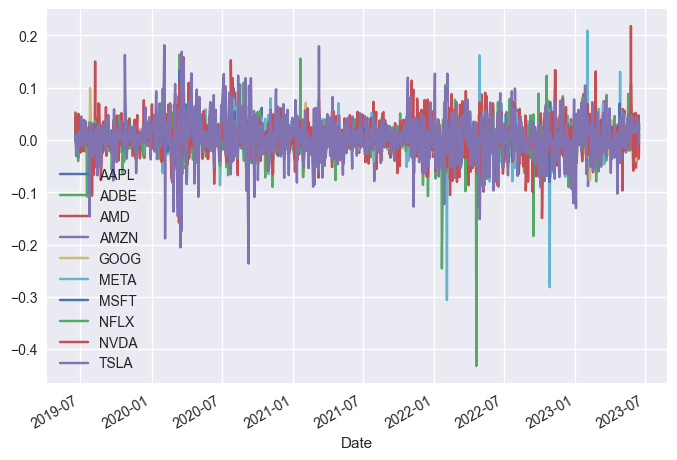

In [11]:
log_returns.plot()

In [12]:
log_returns.mean()*252

AAPL    0.344100
ADBE    0.144471
AMD     0.362371
AMZN    0.074713
GOOG    0.208738
META    0.099975
MSFT    0.250971
NFLX    0.059804
NVDA    0.618237
TSLA    0.709855
dtype: float64

In [13]:
log_returns.var()*252

AAPL    0.114670
ADBE    0.154395
AMD     0.288317
AMZN    0.134165
GOOG    0.108580
META    0.221303
MSFT    0.104520
NFLX    0.250439
NVDA    0.289746
TSLA    0.461616
dtype: float64

In [14]:
log_returns.cov()*252

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
AAPL,0.114670,0.091994,0.111471,0.079945,0.078385,0.095815,0.085735,0.078140,0.124444,0.118556
ADBE,0.091994,0.154395,0.130676,0.092642,0.089411,0.110496,0.099626,0.101268,0.147642,0.125260
AMD,0.111471,0.130676,0.288317,0.114930,0.104003,0.127108,0.112368,0.119309,0.226946,0.175469
AMZN,0.079945,0.092642,0.114930,0.134165,0.080807,0.105737,0.082521,0.102100,0.122561,0.113636
GOOG,0.078385,0.089411,0.104003,0.080807,0.108580,0.104289,0.084783,0.077043,0.116019,0.095767
META,0.095815,0.110496,0.127108,0.105737,0.104289,0.221303,0.095528,0.119751,0.140841,0.114021
MSFT,0.085735,0.099626,0.112368,0.082521,0.084783,0.095528,0.104520,0.077034,0.128470,0.105620
NFLX,0.078140,0.101268,0.119309,0.102100,0.077043,0.119751,0.077034,0.250439,0.130606,0.130706
NVDA,0.124444,0.147642,0.226946,0.122561,0.116019,0.140841,0.128470,0.130606,0.289746,0.192916
TSLA,0.118556,0.125260,0.175469,0.113636,0.095767,0.114021,0.105620,0.130706,0.192916,0.461616


We estimate correlation matrix

In [15]:
log_returns.corr()

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
AAPL,1.000000,0.691378,0.613058,0.644534,0.702479,0.601473,0.783133,0.461103,0.682719,0.515297
ADBE,0.691378,1.000000,0.619363,0.643685,0.690556,0.597775,0.784258,0.514995,0.698048,0.469199
AMD,0.613058,0.619363,1.000000,0.584357,0.587809,0.503206,0.647304,0.444003,0.785198,0.480977
AMZN,0.644534,0.643685,0.584357,1.000000,0.669507,0.613641,0.696866,0.557001,0.621622,0.456623
GOOG,0.702479,0.690556,0.587809,0.669507,1.000000,0.672774,0.795858,0.467206,0.654104,0.427763
META,0.601473,0.597775,0.503206,0.613641,0.672774,1.000000,0.628111,0.508670,0.556195,0.356740
MSFT,0.783133,0.784258,0.647304,0.696866,0.795858,0.628111,1.000000,0.476140,0.738232,0.480847
NFLX,0.461103,0.514995,0.444003,0.557001,0.467206,0.508670,0.476140,1.000000,0.484845,0.384417
NVDA,0.682719,0.698048,0.785198,0.621622,0.654104,0.556195,0.738232,0.484845,1.000000,0.527497
TSLA,0.515297,0.469199,0.480977,0.456623,0.427763,0.356740,0.480847,0.384417,0.527497,1.000000


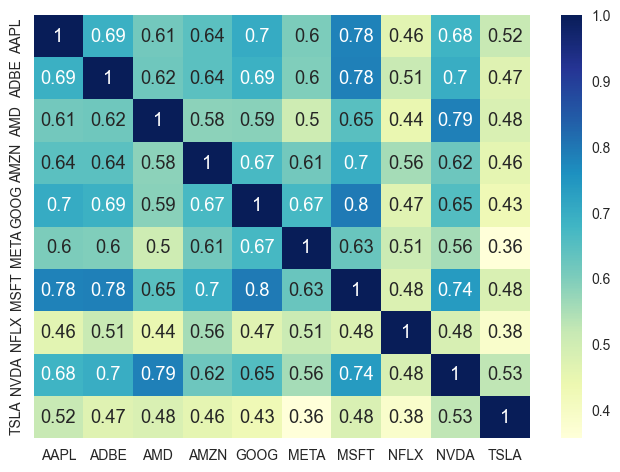

In [16]:
sns.heatmap(log_returns.corr(), annot = True, cmap= "YlGnBu")
plt.show()

Histogram of respective log_returns

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'ADBE'}>,
        <Axes: title={'center': 'AMD'}>],
       [<Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'GOOG'}>,
        <Axes: title={'center': 'META'}>],
       [<Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'NFLX'}>,
        <Axes: title={'center': 'NVDA'}>],
       [<Axes: title={'center': 'TSLA'}>, <Axes: >, <Axes: >]],
      dtype=object)

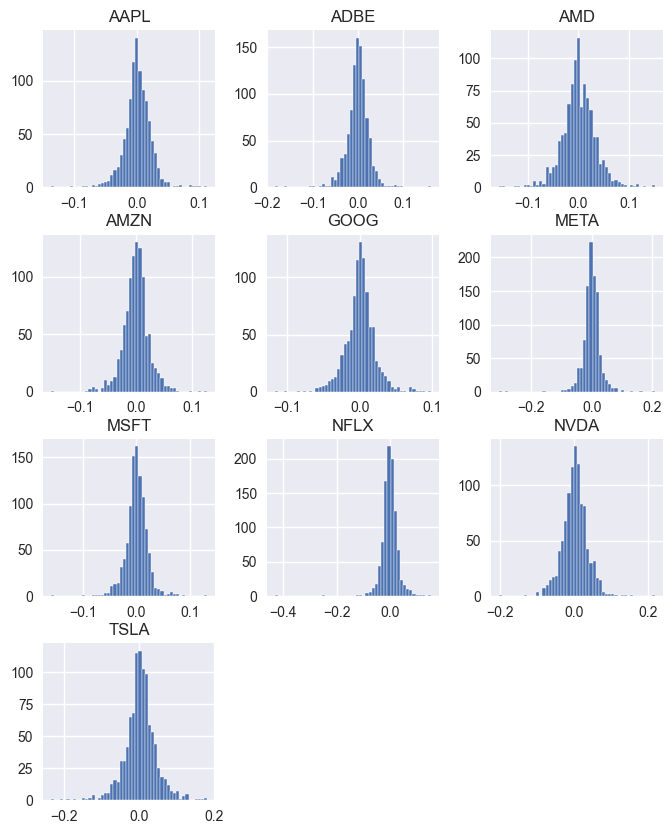

In [17]:
log_returns.hist(bins=50, figsize=(8,10))

We define the weights

In [18]:
portfolio_weights= n_assets*[1/n_assets]

In [19]:
portfolio_weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

We calculate portfolio returns

In [20]:
portfolio_returns=pd.Series(np.dot(portfolio_weights, log_returns.T), index=log_returns.index)

In [21]:
portfolio_returns

Date
2019-06-18    0.017181
2019-06-19    0.007775
2019-06-20    0.004228
2019-06-21   -0.002334
2019-06-24    0.003431
                ...   
2023-06-09    0.014048
2023-06-12    0.021832
2023-06-13    0.008002
2023-06-14    0.009236
2023-06-15    0.008714
Length: 1007, dtype: float64

We get portfolio basic performance

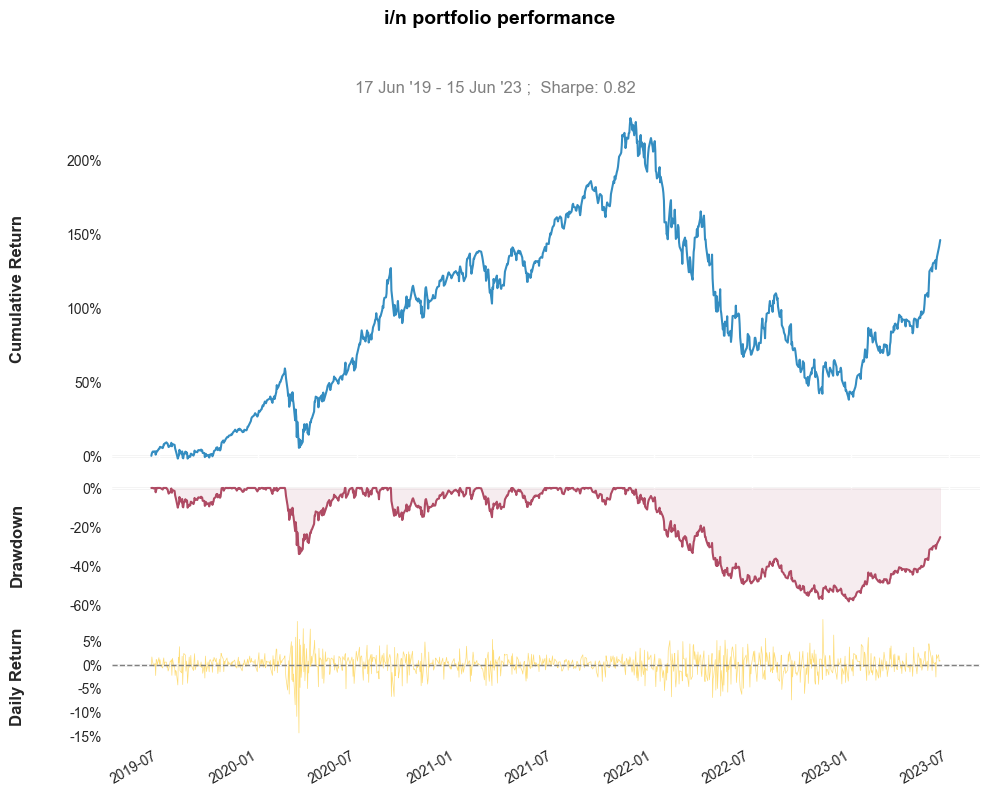

In [22]:
qs.plots.snapshot(portfolio_returns, title="i/n portfolio performance", grayscale=False)

We get basic portfolio evaluation metrics

In [41]:
qs.reports.metrics(portfolio_returns, mode="basic", prepare_returns=False)

                    Strategy
------------------  ----------
Start Period        2019-06-18
End Period          2023-06-15
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   146.24%
CAGR﹪              25.31%

Sharpe              0.82
Prob. Sharpe Ratio  94.7%
Sortino             1.14
Sortino/√2          0.8
Omega               1.15

Max Drawdown        -58.02%
Longest DD Days     570

Gain/Pain Ratio     0.15
Gain/Pain (1M)      0.86

Payoff Ratio        0.87
Profit Factor       1.15
Common Sense Ratio  1.08
CPC Index           0.57
Tail Ratio          0.94
Outlier Win Ratio   3.5
Outlier Loss Ratio  3.56

MTD                 9.49%
3M                  40.73%
6M                  56.08%
YTD                 71.59%
1Y                  45.41%
3Y (ann.)           11.28%
5Y (ann.)           25.31%
10Y (ann.)          25.31%
All-time (ann.)     25.31%

Avg. Drawdown       -4.42%
Avg. Drawdown Days  25
Recovery Factor     2.52
Ulcer Index         0.26
Serenity Index      0.

<Axes: title={'center': 'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

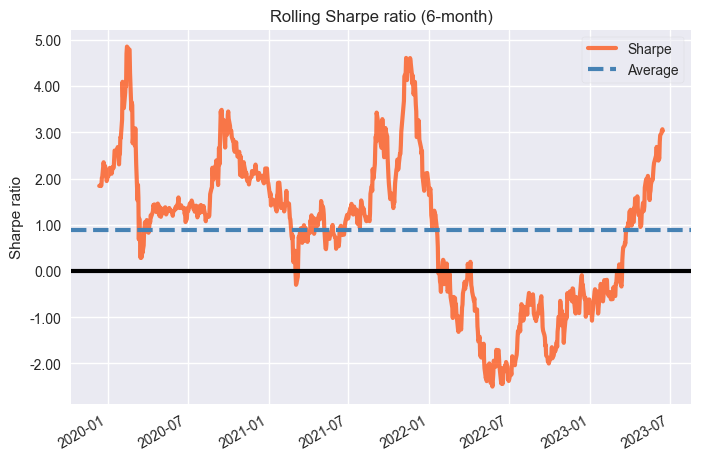

In [24]:
pf.plot_rolling_sharpe(portfolio_returns)

In [25]:
qs.extend_pandas()
print(f"Sharpe Ratio:{portfolio_returns.sharpe():.2f}")
print(f"Sortino Ratio:{portfolio_returns.sortino():.2f}")
print(f"Calmar Ratio:{portfolio_returns.calmar():.2f}")
print(f"Adjusted Sortino Ratio:{portfolio_returns.adjusted_sortino():.2f}")
print(f"avg loss:{portfolio_returns.avg_loss():.2f}")
print(f"avg return:{portfolio_returns.avg_return():.2f}")
print(f"avg win:{portfolio_returns.avg_win():.2f}")
print(f"win loss Ratio:{portfolio_returns.win_loss_ratio():.2f}")
print(f"win rate:{portfolio_returns.win_rate():.2f}")
print(f"worst:{portfolio_returns.worst():.2f}")


Sharpe Ratio:0.82
Sortino Ratio:1.14
Calmar Ratio:0.44
Adjusted Sortino Ratio:0.80
avg loss:-0.02
avg return:0.00
avg win:0.02
win loss Ratio:0.87
win rate:0.57
worst:-0.14


We get Portfolio Performance Metrics

In [26]:
cov_matrix=log_returns.cov()*252

In [27]:
def standard_deviation(weights, cov_matrix):
    variance=weights.T@cov_matrix@weights
    return np.sqrt(variance)

In [28]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

In [29]:
risk_free_rate= 0.04

In [30]:
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return(expected_return(weights, log_returns)-risk_free_rate)/standard_deviation(weights,cov_matrix)

We define the function to minimize (negative Sharpe Ratio)

In [31]:
#In the case of the scipy.optimize.minimize()function there's no direct method to find the maximum value of a function

def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate) 

We set the constraints and bounds

In [32]:
constraints= {'type': 'eq', 'fun':lambda weights: np.sum(weights)-1}
bounds= [(0, 1) for _ in range(len(tickers))]

We set the individual weights

In [33]:
initial_weights= np.array([1/len(tickers)]*len(tickers))
print(initial_weights)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


We optimize the weights to maximize Sharpe ratio using SLSQP (Sequential Least Squares Quadratic Programming)

In [34]:
optimized_results=minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
                           

We get the optimal weights

In [35]:
optimal_weights=optimized_results.x

We display analytics of the Optimal Portfolio

In [36]:
optimal_weights = optimized_results.x

print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
AAPL: 0.1741
ADBE: 0.0000
AMD: 0.0000
AMZN: 0.0000
GOOG: 0.0000
META: 0.0000
MSFT: 0.0000
NFLX: 0.0000
NVDA: 0.5053
TSLA: 0.3207
Expected Annual Return: 0.5999
Expected Volatility: 0.4718
Sharpe Ratio: 1.1868


INITIAL INVESTMENT $50,000.00 USD (WE MUST TAKE INTO ACCOUNT THE LAST STOCK PRICE TO ALLOCATE THE INVESTMENT AND THE LEFTOVERS OR FUNDS REMAINING)

NVDA: 0.5053; $25,265.00
TSLA: 0.3207; $16,035.00
AAPL: 0.1741; $ 8,705.00

We display the Final Portfolio in a plot

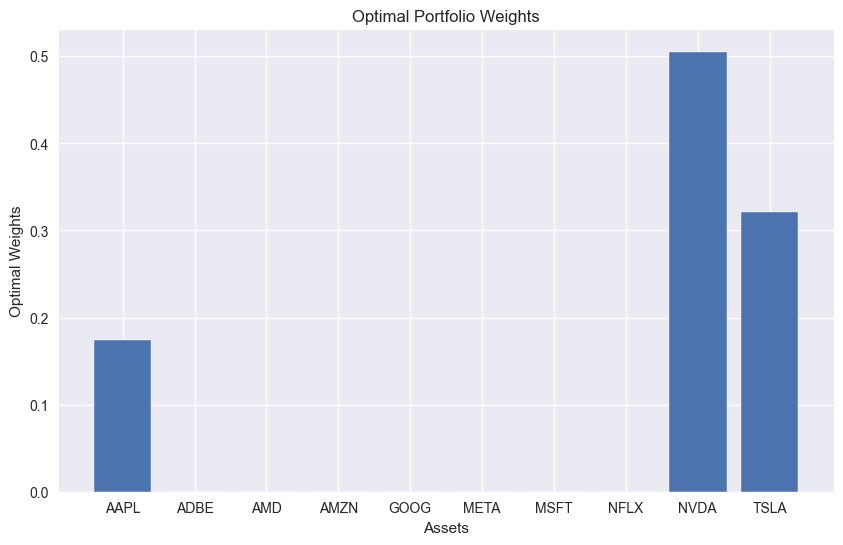

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()